<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/SLR_My__Take_home_(Day_1)_Questions_%5Bv2_0_121020%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Read the data

Load the csv file and set the first column as index

In [5]:
df1= pd.read_csv('/content/car_price.csv')
print(df1.shape)

(301, 9)


In [6]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
df1.set_index('Car_Name', inplace= True)

Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [8]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
dftr = pd.get_dummies(df1, drop_first=True)

In [10]:
import statsmodels.api as sm
xc= sm.add_constant(dftr.iloc[:,dftr.columns!='Selling_Price'])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        03:44:54   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [11]:
# we have got negative coefficients. ( of which only fuel type and owner is not significantly contributing to the overall model accuracy)

# Rest all features are important.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dt= dftr.iloc[:,dftr.columns!='Selling_Price']
gt= pd.DataFrame()
gt['vars'] = dt.columns
gt['vif_score'] = [vif(dt.values, i) for i in range(dt.shape[1])]

In [13]:
gt

,vars,vif_score
0,Year,165.505933
1,Present_Price,3.256794
2,Kms_Driven,2.041561
3,Owner,1.066093
4,Fuel_Type_Diesel,31.417994
5,Fuel_Type_Petrol,121.493777
6,Seller_Type_Individual,2.229915
7,Transmission_Manual,8.878733


In [14]:
# Yes multicollinearity seems to be present in Year, Fuel_type (both) and a little in Transmission too

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# Visually estimating the difference:

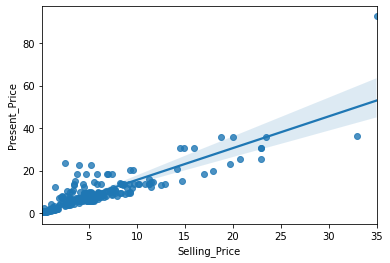

In [16]:
sns.regplot(x=dftr['Selling_Price'], y=dftr['Present_Price'])

As the present price increases, there is a slow increase in selling price too 

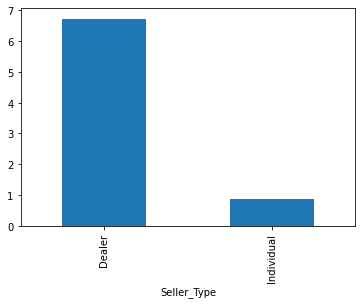

In [17]:
df1['Selling_Price'].groupby(df1['Seller_Type']).mean().plot(kind='bar')

Cars sold through dealers tend to have a higher average selling price compared to sold by individual owners

In [18]:
import statsmodels.api as sm
xc= sm.add_constant(dt[['Present_Price', 'Seller_Type_Individual']])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     548.4
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          1.34e-100
Time:                        03:44:54   Log-Likelihood:                -683.71
No. Observations:                 301   AIC:                             1373.
Df Residuals:                     298   BIC:                             1385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [19]:
# as we can see we have an overall 78% of R2 adjusted from two variables alone- they do contribute significantly 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
xc= sm.add_constant(dftr.iloc[:,dftr.columns!='Selling_Price'])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        03:44:54   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [21]:
# only fuel type and owner is not significantly contributing to the overall model accuracy, rest of them are contributing.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
df1['Inter_price/year'] = df1['Present_Price']*df1['Year']

In [23]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Inter_price/year
Car_Name,,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11258.26
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,19204.02
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,19867.45
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8345.65
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,13836.18


In [24]:
xc= sm.add_constant(df1[['Inter_price/year']])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1024.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.37e-98
Time:                        03:44:55   Log-Likelihood:                -692.11
No. Observations:                 301   AIC:                             1388.
Df Residuals:                     299   BIC:                             1396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7126      0.186  

In [25]:
# present price and year are indeed important contributors for the expected price. The R2 adjusted is almost equal to when taken all the features.

# it is significant, and overall model f score is good too

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
xc= sm.add_constant(dftr[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.80e-24
Time:                        03:44:55   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     298   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1000      3.006  

Diesel cars are somehow contributing more in the prediction model. Petrol cars' P  value is more than 0.05- so they arent contributing so much.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [27]:
 
xc= sm.add_constant(dftr['Transmission_Manual'])
model = sm.OLS(df1['Selling_Price'], xc).fit()
yu = model.predict(xc)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     46.58
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           4.90e-11
Time:                        03:44:55   Log-Likelihood:                -894.20
No. Observations:                 301   AIC:                             1792.
Df Residuals:                     299   BIC:                             1800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4200    

In [28]:
# only 13.5% variation in expected price is explained by the transmission of the car. 
# although the model is doing a good job with just one variable- its not the best we can have

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true= df1['Selling_Price'], y_pred= yu)

22.278603867058717

The analysis of variance (MSE) is :

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
xc= sm.add_constant(dftr['Present_Price'])
model = sm.OLS(df1['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.60e-98
Time:                        03:44:55   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847

In [31]:
model.conf_int(0.99).loc['Present_Price']

0    0.516646
1    0.517052
Name: Present_Price, dtype: float64

In [32]:
model.conf_int(0.95)

,0,1
const,0.706806,0.730249
Present_Price,0.515831,0.517867


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.60e-98
Time:                        03:44:55   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847

In [34]:
model.resid.sum()

-6.110667527536862e-13

In [36]:
# Since we are doing the OLS method- geometrically it is obvious that sum and mean is going to be 0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [43]:
# 1

xc= sm.add_constant(dt)
model = sm.OLS(dftr['Selling_Price'], xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          5.71e-131
Time:                        03:50:35   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [44]:
xc1= sm.add_constant(dt[['Year', 'Present_Price', 'Kms_Driven', 'Owner']])
model = sm.OLS(dftr['Selling_Price'], xc1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     426.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          1.66e-121
Time:                        03:51:47   Log-Likelihood:                -628.25
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     296   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -937.7642     94.392     -9.935

In [45]:
# first model's R2 is better. A better perfomance- since more features are involved